In [1]:
import pandas as pd
import numpy as np
from dictionary import dictPlot

In [2]:
csv_file='..//data//nsduh_clean.csv'
csv_table=pd.read_table(csv_file,sep=',', low_memory=False)

In [3]:
main_data = csv_table

In [4]:
main_data.head()

,CIGEVER,CIGOFRSM,CIGWILYR,CIGTRY,CIGYFU,CIGMFU,CIGREC,CIG30USE,CG30EST,CIG30AV,...,IRFAMIN3,GOVTPROG,INCOME,POVERTY3,TOOLONG,TROUBUND,PDEN10,COUTYP4,MAIIN102,AIIND102
0,1,99,99,13,9999,99,4,93,93,93,...,7,2,4,3.0,2,2,1,1,2,2
1,1,99,99,15,9999,99,1,18,99,4,...,4,2,2,3.0,1,2,1,1,2,2
2,1,99,99,14,9999,99,1,10,99,3,...,7,2,4,3.0,2,2,1,1,2,2
3,1,99,99,16,9999,99,4,93,93,93,...,7,2,4,3.0,2,2,2,2,2,2
4,2,99,99,991,9991,91,91,91,91,91,...,5,2,2,3.0,1,1,1,1,2,2


In [5]:
# select_data = main_data.loc[main_data.ALDAYPMO < 32]
# alc_day = np.median(select_data['ALDAYPMO'])
# alc_day
select_data = main_data.loc[main_data.SEDNM30ES < 6]
sed_day = np.mean(select_data['SEDNM30ES'])
# sed_day
# select_data['SEDNM30ES']
select_data = main_data.loc[main_data.CRKUS30A < 32]
inh_day = np.mean(select_data['CRKUS30A'])
inh_day


9.287878787878787

In [6]:
out = [[0, 0, 0] for x in range(len(main_data))]

try:
    for row_id in range(len(main_data)):
        for column in dict2cat.keys():
            for rule in dict2cat[column]:
                if main_data[column][row_id] in rule[0]:
                    out[row_id][rule[1]] += rule[2]
except:
    print(row_id, rule)
    raise

# print(out)

In [7]:
# print([x for x in out if x[6]>=10])
end_categories = pd.DataFrame(out)
end_categories.head()

,0,1,2
0,0,0,0
1,0,2,7
2,0,3,3
3,0,1,1
4,0,0,0


In [8]:
end_categories[0] = 1
end_categories.head()

,0,1,2
0,1,0,0
1,1,2,7
2,1,3,3
3,1,1,1
4,1,0,0


In [9]:
final_column = end_categories.iloc[:, ::-1].idxmax(axis = 1)

In [10]:
final_column = pd.DataFrame(final_column)

In [11]:
# final_column = final_column.rename(columns = {0: "CATEGORY"})

In [12]:
final_column.head()

,0
0,0
1,2
2,2
3,2
4,0


In [13]:
main_data['RISKGR'] = final_column

In [14]:
main_data.head()

,CIGEVER,CIGOFRSM,CIGWILYR,CIGTRY,CIGYFU,CIGMFU,CIGREC,CIG30USE,CG30EST,CIG30AV,...,GOVTPROG,INCOME,POVERTY3,TOOLONG,TROUBUND,PDEN10,COUTYP4,MAIIN102,AIIND102,RISKGR
0,1,99,99,13,9999,99,4,93,93,93,...,2,4,3.0,2,2,1,1,2,2,0
1,1,99,99,15,9999,99,1,18,99,4,...,2,2,3.0,1,2,1,1,2,2,2
2,1,99,99,14,9999,99,1,10,99,3,...,2,4,3.0,2,2,1,1,2,2,2
3,1,99,99,16,9999,99,4,93,93,93,...,2,4,3.0,2,2,2,2,2,2,2
4,2,99,99,991,9991,91,91,91,91,91,...,2,2,3.0,1,1,1,1,2,2,0


In [15]:
main_data.groupby('RISKGR').groups

{0: Int64Index([    0,     4,     6,     8,     9,    11,    13,    16,    17,
                19,
             ...
             56245, 56255, 56256, 56257, 56262, 56264, 56266, 56271, 56272,
             56273],
            dtype='int64', length=22301),
 1: Int64Index([    5,    10,    12,    14,    31,    34,    35,    36,    39,
                41,
             ...
             56250, 56253, 56258, 56260, 56263, 56267, 56269, 56270, 56274,
             56275],
            dtype='int64', length=19467),
 2: Int64Index([    1,     2,     3,     7,    15,    18,    20,    24,    25,
                28,
             ...
             56236, 56246, 56247, 56251, 56252, 56254, 56259, 56261, 56265,
             56268],
            dtype='int64', length=14508)}

In [16]:
main_data.to_csv('..\\data\\nsduh_with_final_column.csv',index=False)

### Data visualization

In [3]:
groups = [22301, 19467, 14508]
group0 = 22301
group1 = 19467
group2 = 14508

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline

In [5]:
cmap = plt.cm.summer
colors = cmap(np.linspace(0., 1., len(groups)))

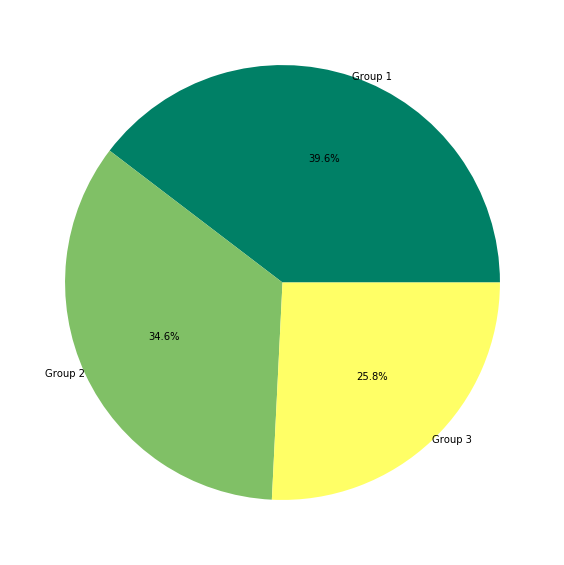

In [7]:
plt.pie(groups, labels=["Group 1","Group 2", "Group 3"], autopct='%1.1f%%', shadow=False, labeldistance=1, colors=colors)
# plt.legend(patches, labels, loc="best")
fig = plt.gcf()
fig.set_size_inches(10,10)
# plt.tight_layout()
plt.show()

#### Percentage of different substance use

In [6]:
out = [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] for x in range(len(main_data))]

try:
    for row_id in range(len(main_data)):
        for column in dictPlot.keys():
            for rule in dictPlot[column]:
                if main_data[column][row_id] in rule[0]:
                    out[row_id][rule[1]] += rule[2]
except:
    print(row_id, rule)
    raise

In [20]:
substance_use = pd.DataFrame(out)
substance_use.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,1,0,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0


In [21]:
substance_use_count = substance_use.sum(axis = 0, skipna = True) 
substance_use_count

0     27305
1     24214
2      8310
3      1029
4      4679
5       822
6      4369
7      5629
8      2594
9      1934
10     3197
11     1218
dtype: int64

In [22]:
substance_use_count_per = (substance_use_count/ 56276 ) * 100
substance_use_count_per

0     48.519795
1     43.027223
2     14.766508
3      1.828488
4      8.314379
5      1.460658
6      7.763523
7     10.002488
8      4.609425
9      3.436634
10     5.680930
11     2.164333
dtype: float64

In [27]:
labels = ["PAPIEROSY", "MARIHUANA/HASZYSZ", "KOKAINA", "HEROINA", "LSD","PCP", "ECSTASY", "LOTNE ROZPUSZCZALINIKI",
          "METAMFETAMINA", "LEKI PRZECIWBÓLOWE", "ŚRODKI USPOKAJAJĄCE", "ŚRODKI POBUDZAJĄCE"]
index = np.arange(len(labels))
index

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [8]:
plt.bar(index, substance_use_count_per, color = sns.light_palette("navy", len(index)))
plt.xlabel('Typ substancji', fontsize=10)
plt.ylabel('Procent osób', fontsize=10)
plt.xticks(index, labels, fontsize=10, rotation=30)
fig = plt.gcf()
fig.set_size_inches(20,10)

NameError: name 'index' is not defined

Bar graph

In [9]:
acc = [74, 74,78,75.5]
acc_imp = [2.8, 2.5, 0.3, 1.3]
bar_labels = ["SVM","KNN","Las losowy","Regresja logistyczna"]
bar_index = np.arange(len(bar_labels))

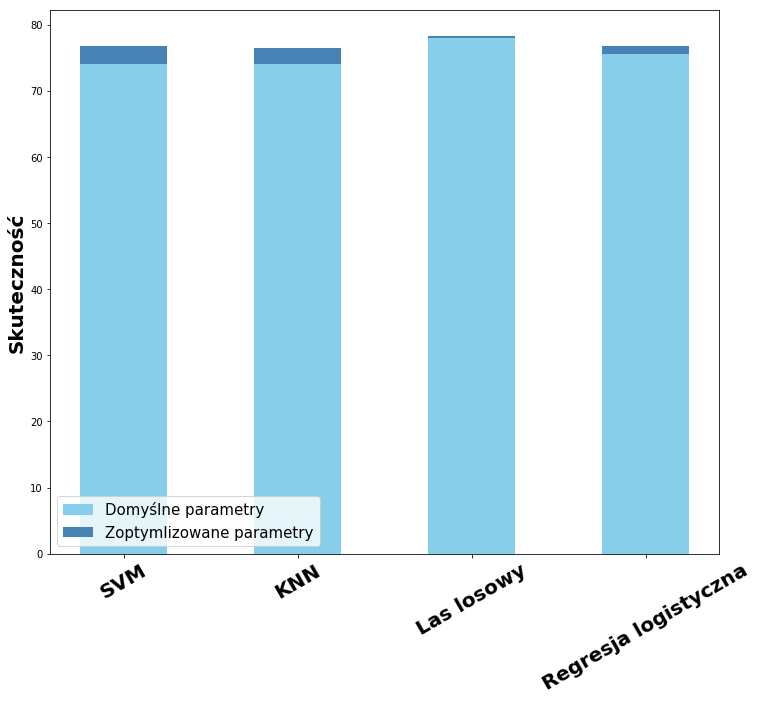

In [30]:
p1 = plt.bar(bar_index, acc, 0.5, color="skyblue")
p2 = plt.bar(bar_index, acc_imp, 0.5, bottom=acc, color=("steelblue"))

plt.ylabel('Skuteczność', fontsize = 20, fontweight='bold')
plt.xticks(bar_index, bar_labels, rotation = 30, fontsize = 20, fontweight='bold')
plt.legend((p1[0], p2[0]), ('Domyślne parametry', 'Zoptymlizowane parametry'), fontsize = 15)
fig = plt.gcf()
fig.set_size_inches(12,10)
plt.show()

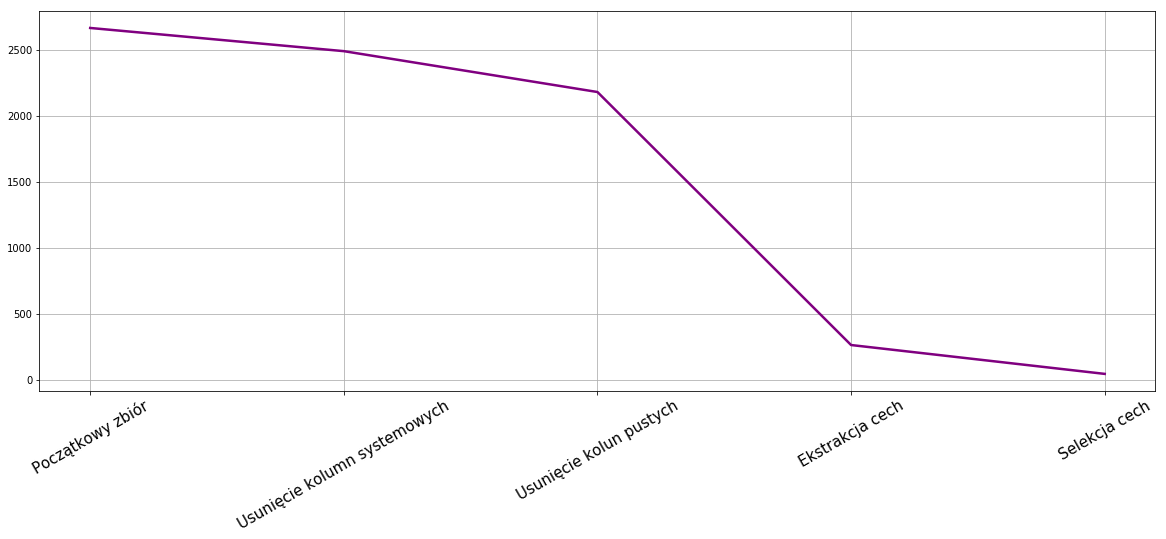

In [49]:
number_of_features = [2668,2492,2182,262,43]
labels_no = ["Początkowy zbiór","Usunięcie kolumn systemowych","Usunięcie kolun pustych","Ekstrakcja cech","Selekcja cech"]
line_index = np.arange(len(labels_no))
plt.xticks(line_index, labels_no, rotation = 30, fontsize = 15)
plt.plot(line_index, number_of_features, linewidth = 2.5, color = "purple")
plt.grid(True)
fig = plt.gcf()
fig.set_size_inches(20,7)